## Import necessary libraries and independencies

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm

## Load the dataset

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/tesla-stock-price.csv'
data = pd.read_csv(url)

# Display the first few rows of the dataframe to understand its structure
print(data.head())

         date   close         volume    open    high       low
0       11:34  270.49      4,787,699  264.50  273.88  262.2400
1  2018/10/15  259.59   6189026.0000  259.06  263.28  254.5367
2  2018/10/12  258.78   7189257.0000  261.00  261.99  252.0100
3  2018/10/11  252.23   8128184.0000  257.53  262.25  249.0300
4  2018/10/10  256.88  12781560.0000  264.61  265.51  247.7700


## Create the Data Cleaning

In [43]:
# Remove leading and trailing whitespace from column names
data.columns = data.columns.str.strip()

# Convert the volume column to float, setting errors='coerce' to handle invalid values
data['volume'] = pd.to_numeric(data['volume'], errors='coerce')
data = data.dropna(subset=['volume'])

# Print cleaned column names
print(data.columns)
data


Index(['date', 'close', 'volume', 'open', 'high', 'low'], dtype='object')


,date,close,volume,open,high,low
1,2018/10/15,259.59,6189026.0,259.06,263.2800,254.5367
2,2018/10/12,258.78,7189257.0,261.00,261.9900,252.0100
3,2018/10/11,252.23,8128184.0,257.53,262.2500,249.0300
4,2018/10/10,256.88,12781560.0,264.61,265.5100,247.7700
5,2018/10/09,262.80,12037780.0,255.25,266.7700,253.3000
...,...,...,...,...,...,...
752,2015/10/21,210.09,4177956.0,211.99,214.8100,208.8000
753,2015/10/20,213.03,14877020.0,227.72,228.6000,202.0000
754,2015/10/19,228.10,2506836.0,226.50,231.1500,224.9400
755,2015/10/16,227.01,4327574.0,223.04,230.4805,222.8700


In [44]:

# Convert the date column to datetime
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')

    # Drop rows with invalid or missing dates
    data = data.dropna(subset=['date'])

    # Print the cleaned data
    print(data.head())
else:
    print(f"Column 'date' not found.")


        date   close      volume    open    high       low
1 2018-10-15  259.59   6189026.0  259.06  263.28  254.5367
2 2018-10-12  258.78   7189257.0  261.00  261.99  252.0100
3 2018-10-11  252.23   8128184.0  257.53  262.25  249.0300
4 2018-10-10  256.88  12781560.0  264.61  265.51  247.7700
5 2018-10-09  262.80  12037780.0  255.25  266.77  253.3000


## Create Interactive Visualizations

### Tesla's Stock Price with a Trend Line

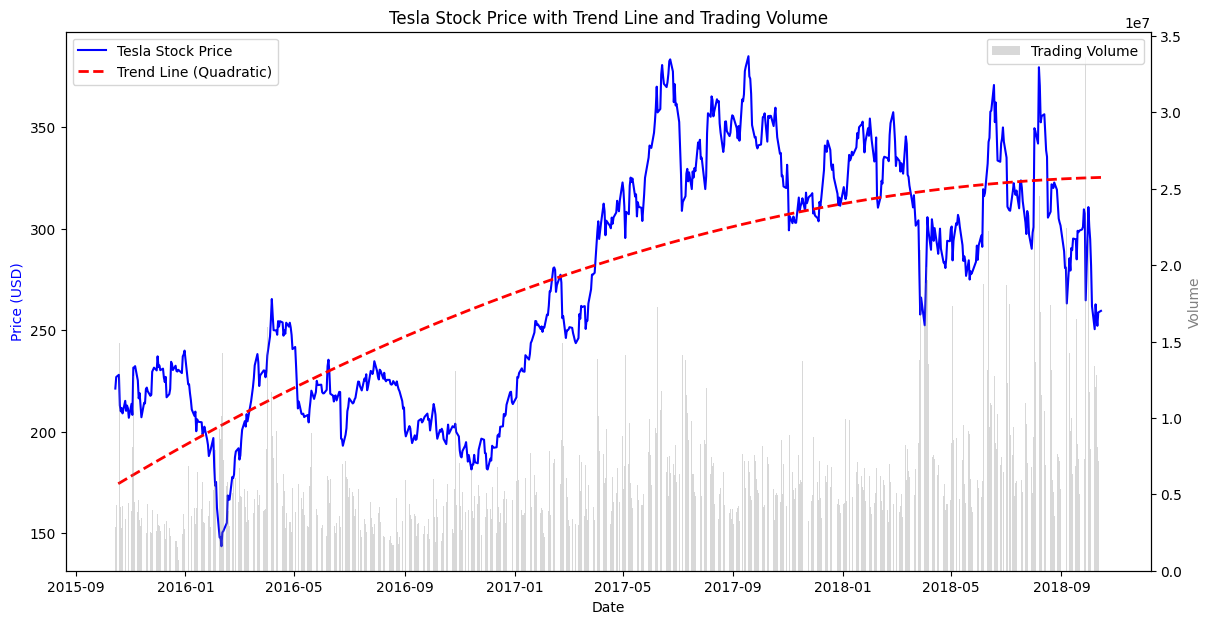

In [47]:
# Convert dates to numerical values for curve fitting
data['date_num'] = (data['date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta('1D')

# Define a polynomial function for trend line fitting
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

# Fit a polynomial of degree 2 (quadratic) to the data
popt, _ = curve_fit(polynomial, data['date_num'], data['close'])

# Generate trend line
data['trend'] = polynomial(data['date_num'], *popt)

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Tesla stock price
ax1.plot(data['date'], data['close'], 'b-', label='Tesla Stock Price')
ax1.plot(data['date'], data['trend'], 'r--', label='Trend Line (Quadratic)', linewidth=2)

# Plot Trading Volume on a secondary y-axis
ax2 = ax1.twinx()
ax2.bar(data['date'], data['volume'], color='gray', alpha=0.3, label='Trading Volume')

# Labeling and formatting
ax1.set_xlabel('Date')
ax1.set_ylabel('Price (USD)', color='b')
ax2.set_ylabel('Volume', color='gray')

# Title and legends
plt.title('Tesla Stock Price with Trend Line and Trading Volume')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

**Polynomial Trend Line:**                                    
We use scipy.optimize.curve_fit to fit a quadratic polynomial to the stock price data.
The trend line helps to visualize the overall trend in the stock price.


**Volume as Bar Chart:**                        
Display the trading volume on a secondary y-axis for clarity.

*This trend line indicates an overall upward trend in Tesla's stock price over the given period, though with fluctuations.*   
*Higher volume bars indicate days with more active trading.*



### Fitting a Gaussian (Normal) Distribution

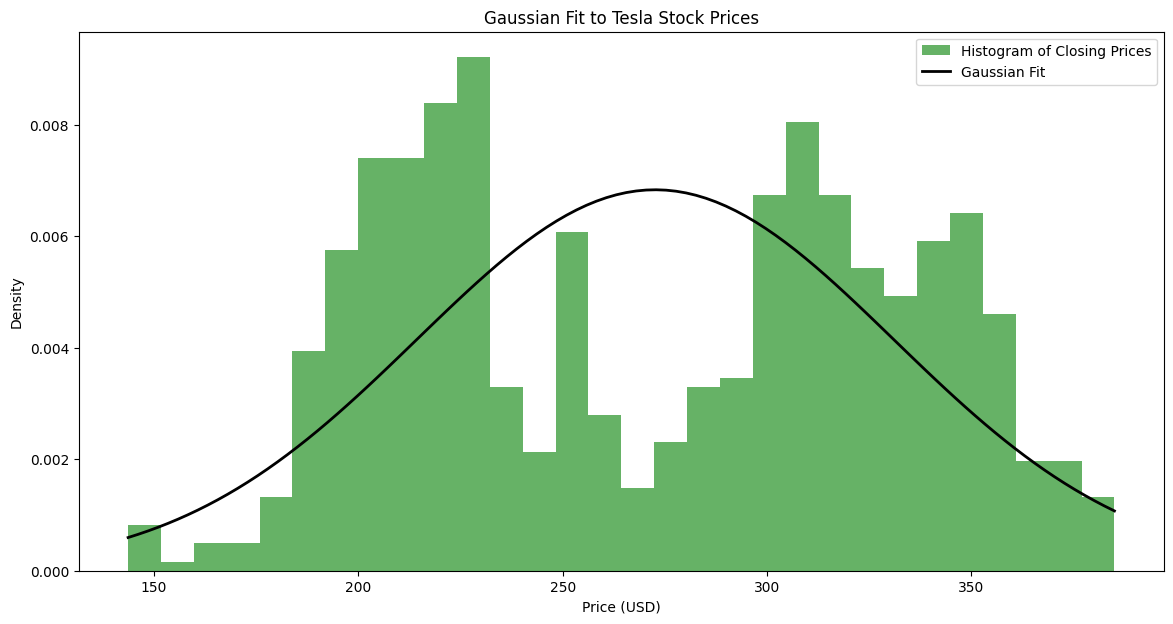

In [48]:
# Extract closing prices for analysis
prices = data['close']

# Fit a Gaussian distribution to the closing prices
(mu, sigma) = norm.fit(prices)

# Generate x values for the Gaussian curve
xmin, xmax = prices.min(), prices.max()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))

# Plot the closing prices as a histogram
ax.hist(prices, bins=30, density=True, alpha=0.6, color='g', label='Histogram of Closing Prices')

# Plot the Gaussian fit
ax.plot(x, p, 'k', linewidth=2, label='Gaussian Fit')

# Labeling and formatting
ax.set_xlabel('Price (USD)')
ax.set_ylabel('Density')
ax.set_title('Gaussian Fit to Tesla Stock Prices')
ax.legend()

# Show the plot
plt.show()

**The histogram** shows the distribution of Tesla's closing prices.

**The Gaussian curve** represents the fitted distribution.

This chart suggests that while the stock prices somewhat follow a normal distribution, there are notable deviations, indicating periods of higher or lower than average prices.

### Tesla's Stock Price with Moving Averages

In [46]:
# Calculate moving averages
data['MA_30'] = data['close'].rolling(window=30).mean()
data['MA_90'] = data['close'].rolling(window=90).mean()

# Create the interactive plot
fig = go.Figure()

# Add a trace for Tesla stock price
fig.add_trace(go.Scatter(
    x=data['date'], 
    y=data['close'],  
    mode='lines',
    name='Tesla Stock Price'
))

# Add traces for moving averages
fig.add_trace(go.Scatter(
    x=data['date'], 
    y=data['MA_30'],  
    mode='lines',
    name='30-Day Moving Average'
))

fig.add_trace(go.Scatter(
    x=data['date'], 
    y=data['MA_90'],  
    mode='lines',
    name='90-Day Moving Average'
))

# Add a bar trace for Tesla trading volume
fig.add_trace(go.Bar(
    x=data['date'], 
    y=data['volume'],  
    name='Tesla Trading Volume',
    yaxis='y2'
))

# Update layout
fig.update_layout(
    title='Tesla Stock Price with Moving Averages and Trading Volume',
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    yaxis2=dict(
        title='Volume',
        overlaying='y',
        side='right'
    ),
    template='plotly_dark',
    xaxis_rangeslider_visible=True  # Add a range slider for better interactivity
)

# Show the figure
fig.show()


**Moving Averages:**               
* 30-Day Moving Average: Smooths out short-term fluctuations and highlights longer-term trends.       
*This smooths out short-term fluctuations and highlights longer-term trends.*
* 90-Day Moving Average: Provides a longer-term view of the stock price trend.   
*This further smooths the data, indicating even longer-term trends compared to the 30-day moving average.*

**Volume as Bar Chart:**             
Display the trading volume as bars to show the intensity of trading activity.  
*Higher bars indicate days with more active trading.*